<a href="https://colab.research.google.com/github/andre-arantes/ia/blob/master/lista4/naive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Vamos experimentar agora o algoritmo Naive Bayes?**

In [82]:
!pip -q install yellowbrick

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.naive_bayes import GaussianNB

In [84]:
df = pd.read_csv('/content/sample_data/weather.nominal.csv')
df.head()

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [85]:
X = df.iloc[:,0:4].values
Y = df.iloc[:,4].values

In [86]:
label_encoder_outlook = LabelEncoder()
label_encoder_temperature = LabelEncoder()
label_encoder_humidity = LabelEncoder()
label_encoder_play = LabelEncoder()

In [87]:
from sklearn.preprocessing import LabelEncoder
X[:, 0] = label_encoder_outlook.fit_transform(X[:,0])
X[:, 1] = label_encoder_temperature.fit_transform(X[:,1])
X[:, 2] = label_encoder_humidity.fit_transform(X[:,2])
X[:, 3] = label_encoder_play.fit_transform(X[:,3])

In [88]:
modelo = GaussianNB()

In [89]:
modelo.fit(X, Y)

GaussianNB()



> **Vamos testar o modelo?**



In [97]:
X

array([[2, 1, 0, 0],
       [2, 1, 0, 1],
       [0, 1, 0, 0],
       [1, 2, 0, 0],
       [1, 0, 1, 0],
       [1, 0, 1, 1],
       [0, 0, 1, 1],
       [2, 2, 0, 0],
       [2, 0, 1, 0],
       [1, 2, 1, 0],
       [2, 2, 1, 1],
       [0, 2, 0, 1],
       [0, 1, 1, 0],
       [1, 2, 0, 1]], dtype=object)

In [90]:
previsoes = modelo.predict(X)

In [91]:
previsoes

array(['no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no'], dtype='<U3')

In [92]:
Y

array(['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no'], dtype=object)

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(Y,previsoes)

0.9285714285714286

In [94]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(Y, previsoes)

array([[4, 1],
       [0, 9]])

0.9285714285714286

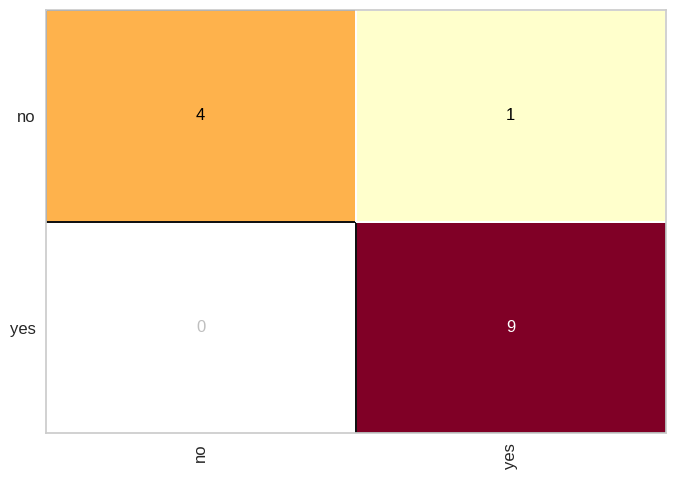

In [95]:
cm = ConfusionMatrix(modelo)
cm.fit(X, Y)
cm.score(X, Y)

In [96]:
print(classification_report(Y, previsoes))

              precision    recall  f1-score   support

          no       1.00      0.80      0.89         5
         yes       0.90      1.00      0.95         9

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14

